In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def getDataFrameFromCSV(filePath):
    df = pd.read_csv(filePath + '.csv')
    return df

In [3]:
def createPlot(dataFrame, columnName, plotTitle = ""):
    colValues = dataFrame[columnName]
    dateValues = dataFrame['date']
    ypoints = np.array(colValues)
    xpoints = np.array(dateValues)
    f = plt.figure()
    f.set_figwidth(12)
    f.set_figheight(6)
    plt.plot(xpoints, ypoints, color='green')
    plt.title(plotTitle)
    plt.xlabel("days")
    plt.ylabel("price")
    plt.show()

In [4]:
df = getDataFrameFromCSV('../../data/price_data/vegetable/vegetable')

In [5]:
print("Data Types:")
print(df.dtypes)

Data Types:
product_name           object
weight_raw             object
weight_value          float64
weight_unit            object
price_raw              object
price                 float64
discount_price_raw     object
discount_price        float64
date                   object
time                   object
dtype: object


In [6]:
print("Sample Data:")
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y')
print(df.head(10))

Sample Data:
                                    product_name weight_raw  weight_value  \
0              Deshi Peyaj (Local Onion) ± 50 gm       1 kg           1.0   
1                       Potato Regular (± 50 gm)       1 kg           1.0   
2          Boro Alu (Big Diamond Potato) ± 50 gm       1 kg           1.0   
3             Kacha Morich (Green Chilli) ±12 gm     250 gm         250.0   
4         Coriander Leaves (Dhonia Pata) ± 10 gm     100 gm         100.0   
5                             Red Tomato ± 25 gm     500 gm         500.0   
6               Roshun (Garlic Imported) ± 25 gm     500 gm         500.0   
7                  Potol (Pointed Gourd) ± 25 gm     500 gm         500.0   
8  Peyaj (Onion Imported) Special Offer ± 100 gm       3 kg           3.0   
9                 Dheros (Ladies Finger) ± 25 gm     500 gm         500.0   

  weight_unit price_raw  price discount_price_raw  discount_price       date  \
0          kg      ৳ 60   60.0               ৳ 55          

In [7]:
def showLineGraph(dataFrame, item, weight):
    df = dataFrame
    itemName = item
    filteredDf = df.loc[(df.product_name == itemName) & (df.weight_value == weight)]
    createPlot(filteredDf, 'price', itemName)

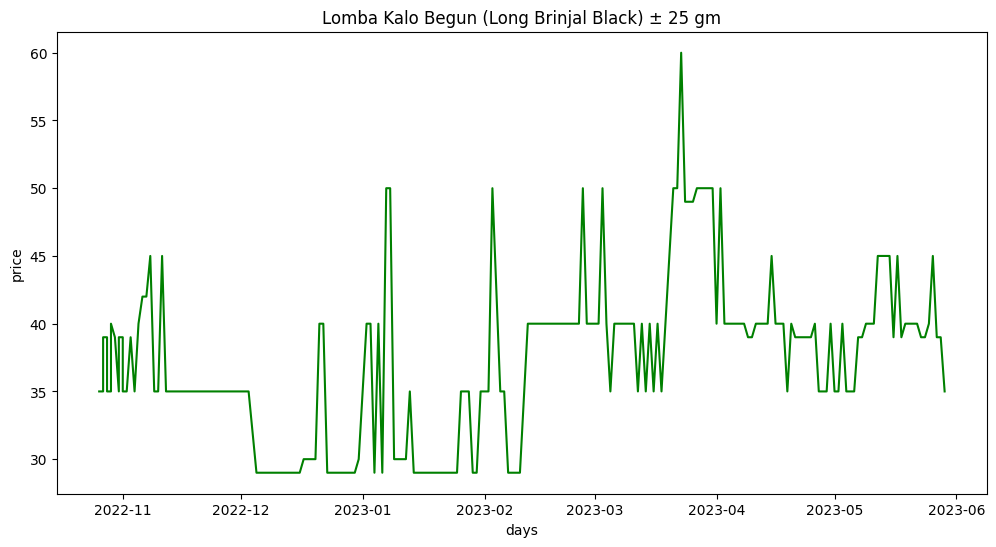

In [8]:
showLineGraph(df, "Lomba Kalo Begun (Long Brinjal Black) ± 25 gm", 500)

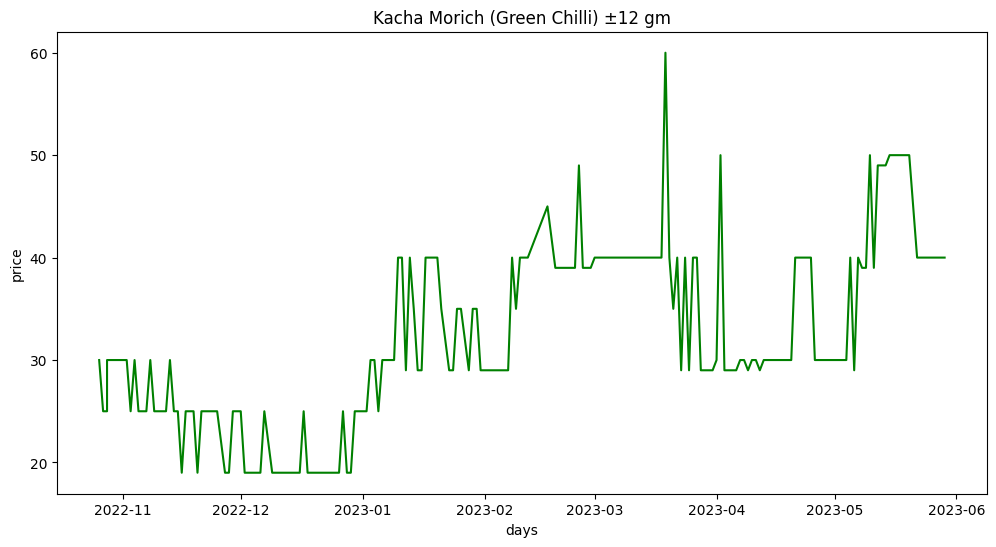

In [9]:
showLineGraph(df, "Kacha Morich (Green Chilli) ±12 gm", 250)

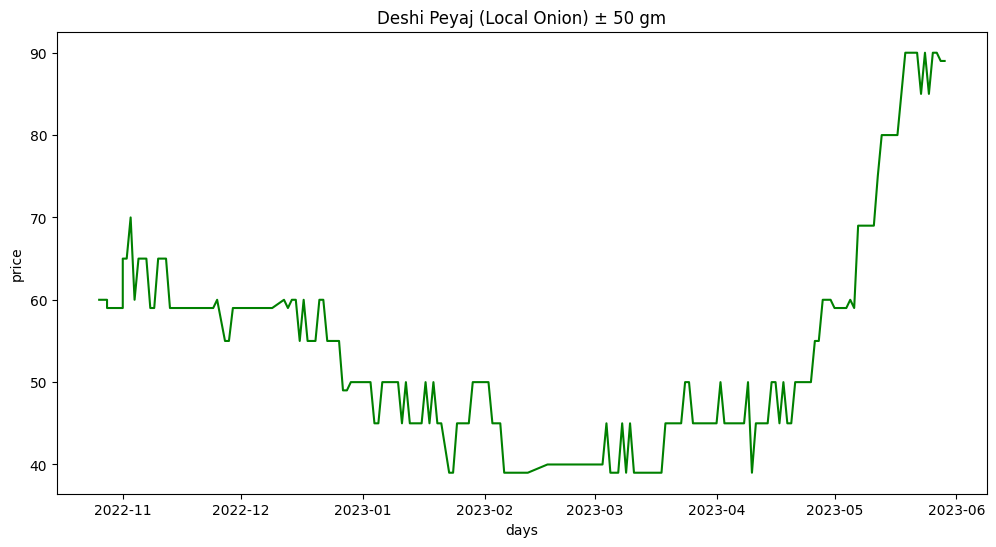

In [10]:
showLineGraph(df, "Deshi Peyaj (Local Onion) ± 50 gm", 1)

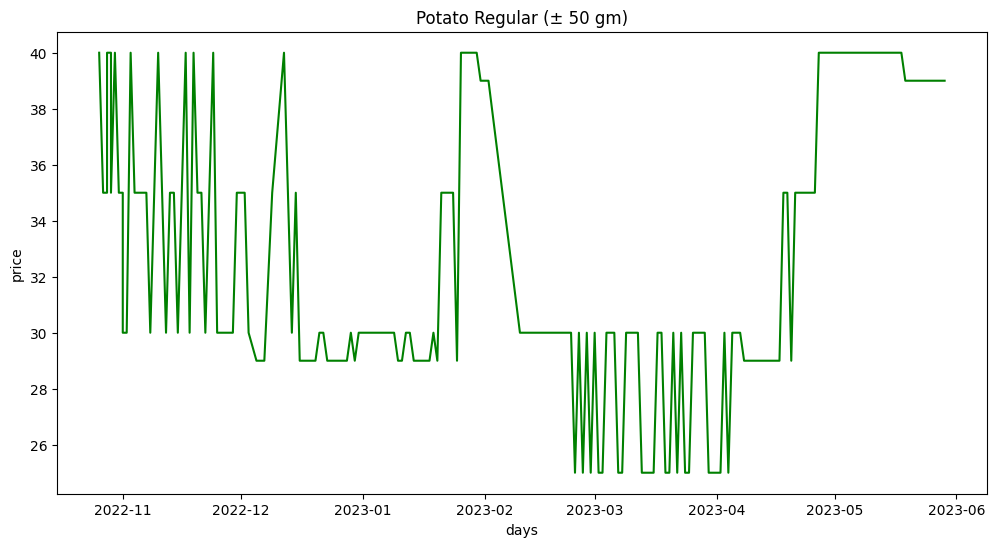

In [11]:
showLineGraph(df, "Potato Regular (± 50 gm)", 1)

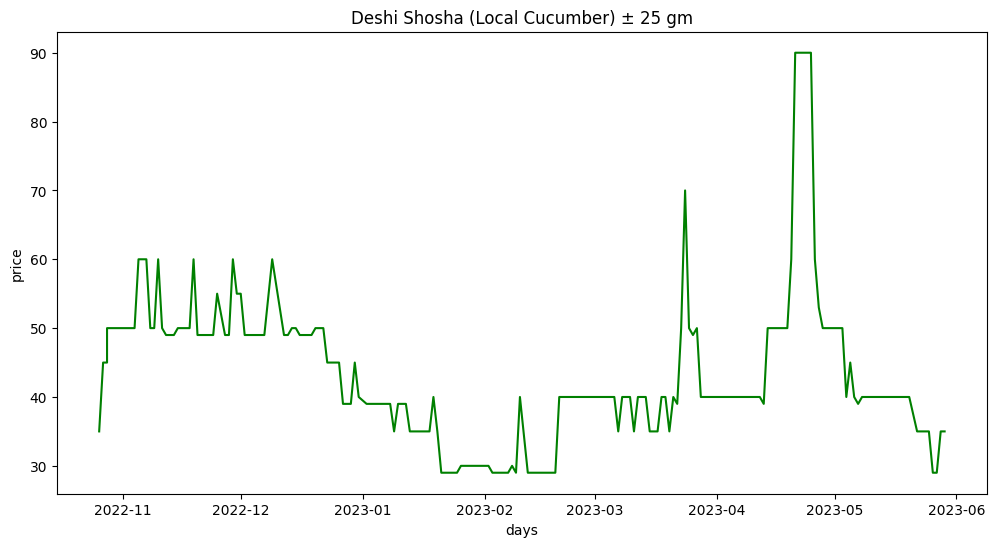

In [12]:
showLineGraph(df, "Deshi Shosha (Local Cucumber) ± 25 gm", 500)

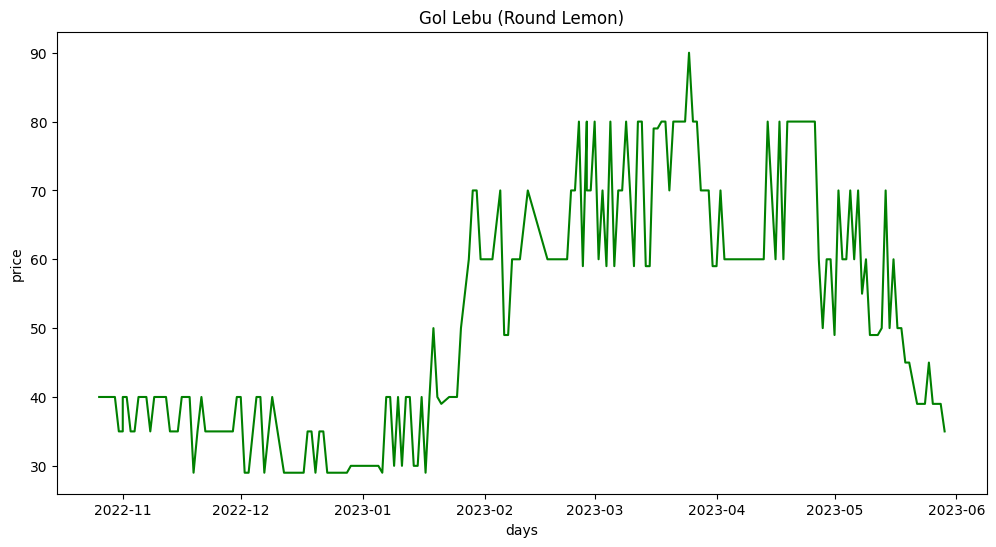

In [13]:
showLineGraph(df, "Gol Lebu (Round Lemon)", 4)

In [14]:
def createMultilinePlot(dataFrames, columnNames, plotTitle = "", weight = ["1"], lineNames = []):
    f = plt.figure()
    f.set_figwidth(12)
    f.set_figheight(8)
    i = 0
    pltTitle = "Vegetable"
    colors = ['g', 'b', 'c','m', 'k']
    lineNames = ["Lomba Kalo Begun (Long Brinjal Black) unit 500 gm", 
         "Kacha Morich (Green Chilli) unit 250 gm", 
         "Deshi Peyaj (Local Onion) unit 1 kg",
        "Deshi Shosha (Local Cucumber) unit 500 gm",
        "Gol Lebu (Round Lemon) unit 4 pcs"]

    for dataFrame, columnName in zip(dataFrames, columnNames):
        #dataFrame.head(3)
        colValues = dataFrame[columnName]
        dateValues = dataFrame['date']
        ypoints = np.array(colValues)
        xpoints = np.array(dateValues)
        plt.plot(xpoints, ypoints, color=colors[i], label=lineNames[i])
        i += 1
        i %= len(colors)
    #plt.title(plotTitle+ "\n unit:"+ weight)
    plt.xlabel("days")
    plt.ylabel("price BDT")
    plt.legend(loc='best')
    plt.title(pltTitle)
    plt.show()

In [15]:
def showMultipleLineGraph(dataFrame, items, weights, weightRaws):
    filteredDfs = []
    itemNames = []
    df = dataFrame
    for itemName, weight in zip(items,weights):
        itemNames.append(itemName)
        filteredDf = df.loc[(df.product_name == itemName) & (df.weight_value == weight)]
        filteredDfs.append(filteredDf)
    createMultilinePlot(filteredDfs, ['price','price', 'price', 'price', 'price'], itemNames, weightRaws, items)

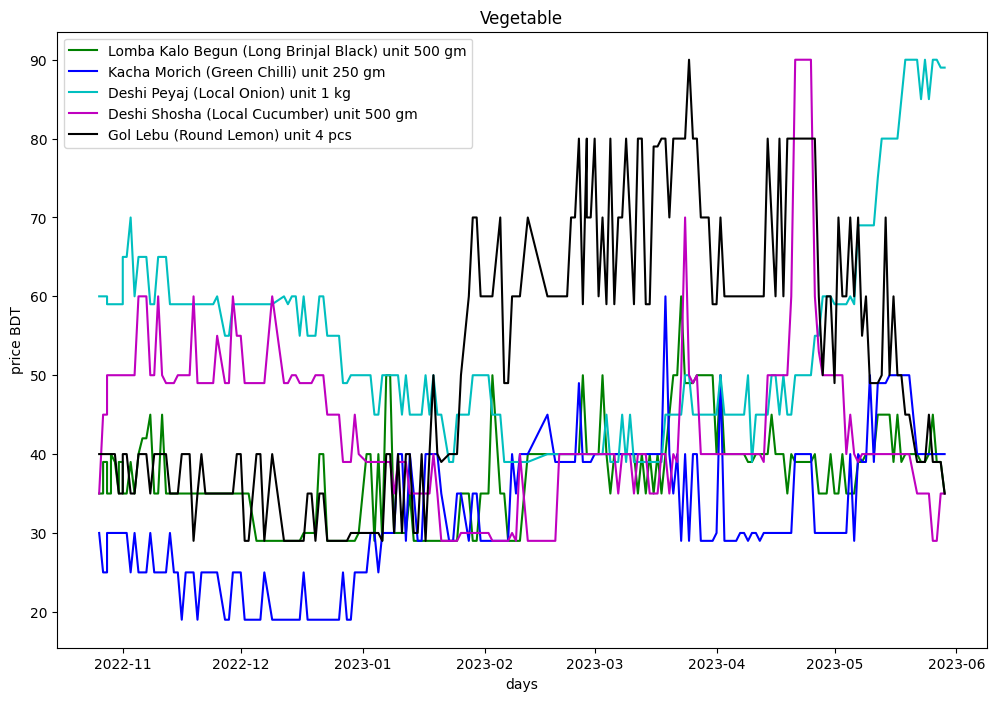

In [16]:
items = ["Lomba Kalo Begun (Long Brinjal Black) ± 25 gm", 
         "Kacha Morich (Green Chilli) ±12 gm", 
         "Deshi Peyaj (Local Onion) ± 50 gm",
        "Deshi Shosha (Local Cucumber) ± 25 gm",
        "Gol Lebu (Round Lemon)"]
showMultipleLineGraph(df, items, [500,250,1,500,4], [ "500 gm","250 gm", "1 kg", "500 gm", "4 pcs"])